In [5]:
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = (8,6)

In [6]:
from pyspark.sql import SparkSession, Row, functions, Column
from pyspark.sql.types import *

from pyspark.ml import Pipeline, Estimator
from pyspark.ml.feature import SQLTransformer, VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import TrainValidationSplit, ParamGridBuilder
from pyspark.ml.regression import (LinearRegression,
                                   GBTRegressor,
                                   RandomForestRegressor,
                                   DecisionTreeRegressor)

import sys
from weather_tools_mv import *

In [7]:
schema = StructType([
    StructField('station', StringType(), False),
    StructField('date', DateType(), False),
    # StructField('dayofyear', IntegerType(), False),
    StructField('latitude', FloatType(), False),
    StructField('longitude', FloatType(), False),
    StructField('elevation', FloatType(), False),
    StructField('tmax', FloatType(), False),
])

def get_data(inputloc, tablename='data'):
    data = spark.read.csv(inputloc, schema=schema)
    data.createOrReplaceTempView(tablename)
    return data

# Part 2a

In [8]:
# Part 2a

input_loc = 'tmax-2'

data = get_data(input_loc)

# years = list(map(lambda x: str(x), range(2000, 2018)))

years = ['2000', '2001', '2002', '2003']

reduced_data = dict()

def resolved_max(df):
    df_max = df.groupBy('station').agg({'date': 'max'}).select(functions.col('station'),
                                                              functions.col('max(date)').alias('d_max'))
    
    d_max = df.join(df_max, 'station').where(functions.col('d_max') == functions.col('date'))
    
    fin_ret = d_max.select(functions.col('latitude'),
                            functions.col('longitude'),
                            functions.col('tmax'),
                            functions.col('station'))
    
    return list(map(lambda row: row.asDict(), fin_ret.collect()))

for i in range(0, len(years) - 1):
    lower = years[i]
    upper = years[i+1]
    zone = data.filter(functions.col('date') < upper).filter(functions.col('date') >= lower)
    reduced_data[lower+"_"+upper] = resolved_max(zone)

reduced_data['2000_2001']

[{'latitude': 38.62779998779297,
  'longitude': -92.55449676513672,
  'station': 'USC00231189',
  'tmax': 27.799999237060547},
 {'latitude': 76.7699966430664,
  'longitude': -18.670000076293945,
  'station': 'GL000004320',
  'tmax': 9.5},
 {'latitude': 4.019999980926514,
  'longitude': 9.720000267028809,
  'station': 'CM000004910',
  'tmax': 30.5},
 {'latitude': 35.74250030517578,
  'longitude': -78.83689880371094,
  'station': 'USC00310212',
  'tmax': 19.399999618530273},
 {'latitude': 62.93669891357422,
  'longitude': 22.490800857543945,
  'station': 'FIE00144322',
  'tmax': 19.799999237060547},
 {'latitude': -35.90039825439453,
  'longitude': 150.14370727539062,
  'station': 'ASN00069148',
  'tmax': 17.0},
 {'latitude': 39.47079849243164,
  'longitude': -87.40809631347656,
  'station': 'USC00128723',
  'tmax': 29.399999618530273},
 {'latitude': 47.5088996887207,
  'longitude': -99.12110137939453,
  'station': 'USC00321362',
  'tmax': 28.299999237060547},
 {'latitude': 43.35440063476

In [9]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

## Map for Year 2000

/Users/mvachher/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/mvachher/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


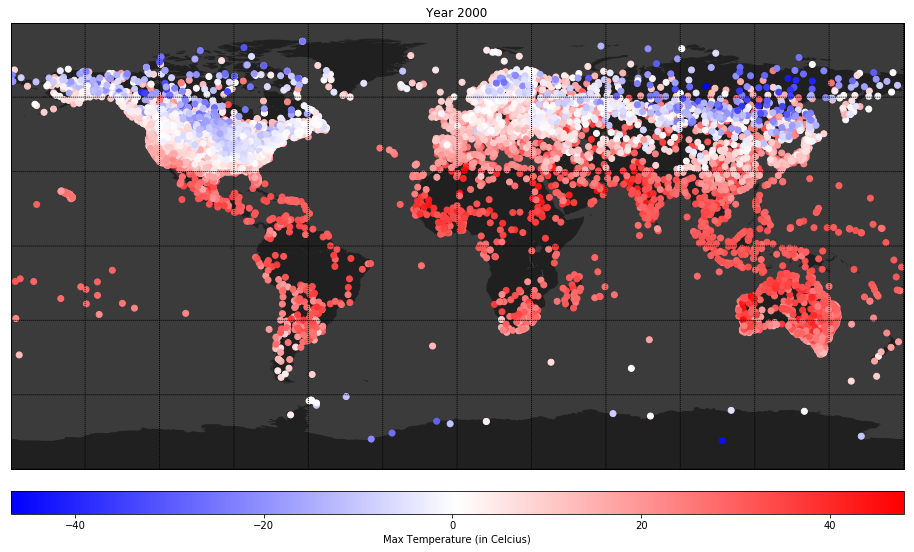

In [10]:
plt.figure(figsize=(16,12))

eq_map = Basemap(projection='cyl', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=0)
# eq_map.drawcoastlines()
# eq_map.drawcountries()
eq_map.fillcontinents(color = '#202020', lake_color='#3b3b3b', zorder=0.5)
eq_map.drawmapboundary(fill_color='#3b3b3b')
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))

lat = []
lon = []
val = []

for y in reduced_data['2000_2001']:
    lon.append(y['longitude'])
    lat.append(y['latitude'])
    val.append(y['tmax'])

x, y = eq_map(lon, lat)

cs = eq_map.scatter(x, y, c=val, marker="o", cmap=cm.bwr)
# add colorbar.
cbar = eq_map.colorbar(cs,location='bottom',pad="5%")
cbar.set_label('Max Temperature (in Celcius)')
plt.title('Year 2000')
plt.show()

## Map for Year 2001

/Users/mvachher/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/mvachher/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


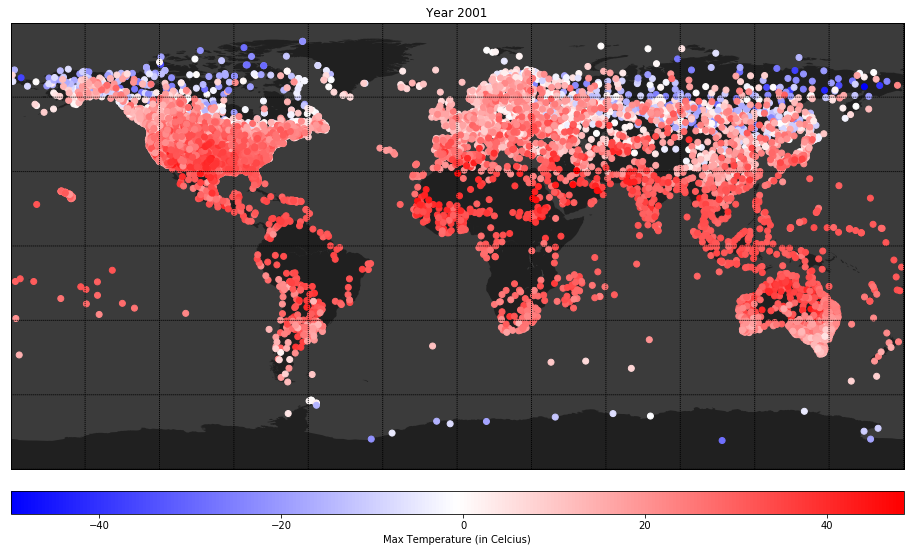

In [11]:
plt.figure(figsize=(16,12))

eq_map = Basemap(projection='cyl', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=0)
# eq_map.drawcoastlines()
# eq_map.drawcountries()
eq_map.fillcontinents(color = '#202020', lake_color='#3b3b3b', zorder=0.5)
eq_map.drawmapboundary(fill_color='#3b3b3b')
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))

lat = []
lon = []
val = []

for y in reduced_data['2001_2002']:
    lon.append(y['longitude'])
    lat.append(y['latitude'])
    val.append(y['tmax'])

x, y = eq_map(lon, lat)

cs = eq_map.scatter(x, y, c=val, marker="o", cmap=cm.bwr)
# add colorbar.
cbar = eq_map.colorbar(cs,location='bottom',pad="5%")
cbar.set_label('Max Temperature (in Celcius)')
plt.title('Year 2001')
plt.show()

# Part 2b

In [40]:
def make_weather_trainers(trainRatio,
                          estimator_gridbuilders,
                          metricName=None):
    """Construct a list of TrainValidationSplit estimators for weather data
       where `estimator_gridbuilders` is a list of (Estimator, ParamGridBuilder) tuples
       and 0 < `trainRatio` <= 1 determines the fraction of rows used for training.
       The RegressionEvaluator will use a non-default `metricName`, if specified.
    """
    feature_cols = ['latitude', 'longitude', 'elevation']
    column_names = dict(featuresCol="features",
                        labelCol="tmax",
                        predictionCol="tmax_pred")

    feature_assembler = VectorAssembler(
        inputCols=feature_cols,
        outputCol=column_names["featuresCol"])
    ev = (RegressionEvaluator()
          .setLabelCol(column_names["labelCol"])
          .setPredictionCol(column_names["predictionCol"])
    )
    if metricName:
        ev = ev.setMetricName(metricName)
    tvs_list = []
    for est, pgb in estimator_gridbuilders:
        est = est.setParams(**column_names)

        pl = Pipeline(stages=[feature_assembler, est])

        paramGrid = pgb.build()
        tvs_list.append(TrainValidationSplit(estimator=pl,
                                             estimatorParamMaps=paramGrid,
                                             evaluator=ev,
                                             trainRatio=trainRatio))
    return tvs_list

def get_best_weather_model(data):
    train, test = data.randomSplit([0.75, 0.25])
    train = train.cache()
    test = test.cache()

    # e.g., use print(LinearRegression().explainParams()) to see what can be tuned
    estimator_gridbuilders = [
        estimator_gridbuilder(
            LinearRegression(),
            dict(regParam=[0.3, 0.6],
                 elasticNetParam=[0, 0.5],
                 maxIter=[10, 20]
            )),

        estimator_gridbuilder(
            GBTRegressor(),
            dict(lossType=["squared"],
                 maxDepth=[5, 10],
                 maxIter=[2, 5],
                 stepSize=[0.1]
            )),

        estimator_gridbuilder(
            RandomForestRegressor(),
            dict(numTrees=[5, 10],
                 maxDepth=[5, 15],
                 featureSubsetStrategy=["auto"]
            ))
    ]
    
    metricName = 'r2'
    tvs_list = make_weather_trainers(.2, # fraction of data for training
                                     estimator_gridbuilders,
                                     metricName)
    ev = tvs_list[0].getEvaluator()
    scorescale = 1 if ev.isLargerBetter() else -1
    model_name_scores = []
    for tvs in tvs_list:
        model = tvs.fit(train)
        test_pred = model.transform(test)
        score = ev.evaluate(test_pred) * scorescale
        model_name_scores.append((model, get_estimator_name(tvs.getEstimator()), score))
    
    best_model, best_name, best_score = max(model_name_scores, key=lambda triplet: triplet[2])
    print("\n\nBest model is %s with validation data %s score %f" % (best_name, ev.getMetricName(), best_score*scorescale))
    return best_model

fortrain, holdout = data.randomSplit([0.75, 0.25])

model = get_best_weather_model(fortrain)
print("\n\n\nBest parameters on test data:\n", get_best_tvs_model_params(model))



Best model is GBTRegressor with validation data r2 score 0.349027



Best parameters on test data:
 ('r2', 0.33791125405080014, {Param(parent='GBTRegressor_4c978c52e6d89bf5aef6', name='lossType', doc='Loss function which GBT tries to minimize (case-insensitive). Supported options: squared, absolute'): 'squared', Param(parent='GBTRegressor_4c978c52e6d89bf5aef6', name='maxDepth', doc='Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes.'): 10, Param(parent='GBTRegressor_4c978c52e6d89bf5aef6', name='maxIter', doc='max number of iterations (>= 0).'): 5, Param(parent='GBTRegressor_4c978c52e6d89bf5aef6', name='stepSize', doc='Step size to be used for each iteration of optimization (>= 0).'): 0.1})


In [71]:
import elevation_grid as eg
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
import numpy as np

lat_range = range(-90, 90, 1)
lon_range = range(-180, 180, 1)

combo = []

for lat in lat_range:
    for lon in lon_range:
        elev = eg.get_elevation(lat, lon)
        combo.append((lat, lon, float(elev)))

dataset = spark.createDataFrame(combo,["latitude", "longitude", "elevation"])
pred = model.transform(dataset).collect()

collected_predictions = list(map(lambda row: row.asDict(), pred))

collected_predictions

[{'elevation': 0.0,
  'features': DenseVector([-90.0, -180.0, 0.0]),
  'latitude': -90,
  'longitude': -180,
  'tmax_pred': -12.091761736194762},
 {'elevation': 0.0,
  'features': DenseVector([-90.0, -179.0, 0.0]),
  'latitude': -90,
  'longitude': -179,
  'tmax_pred': -12.091761736194762},
 {'elevation': 0.0,
  'features': DenseVector([-90.0, -178.0, 0.0]),
  'latitude': -90,
  'longitude': -178,
  'tmax_pred': -12.091761736194762},
 {'elevation': 0.0,
  'features': DenseVector([-90.0, -177.0, 0.0]),
  'latitude': -90,
  'longitude': -177,
  'tmax_pred': -12.091761736194762},
 {'elevation': 0.0,
  'features': DenseVector([-90.0, -176.0, 0.0]),
  'latitude': -90,
  'longitude': -176,
  'tmax_pred': -12.091761736194762},
 {'elevation': 0.0,
  'features': DenseVector([-90.0, -175.0, 0.0]),
  'latitude': -90,
  'longitude': -175,
  'tmax_pred': -12.091761736194762},
 {'elevation': 0.0,
  'features': DenseVector([-90.0, -174.0, 0.0]),
  'latitude': -90,
  'longitude': -174,
  'tmax_pred': 

/Users/mvachher/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/mvachher/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


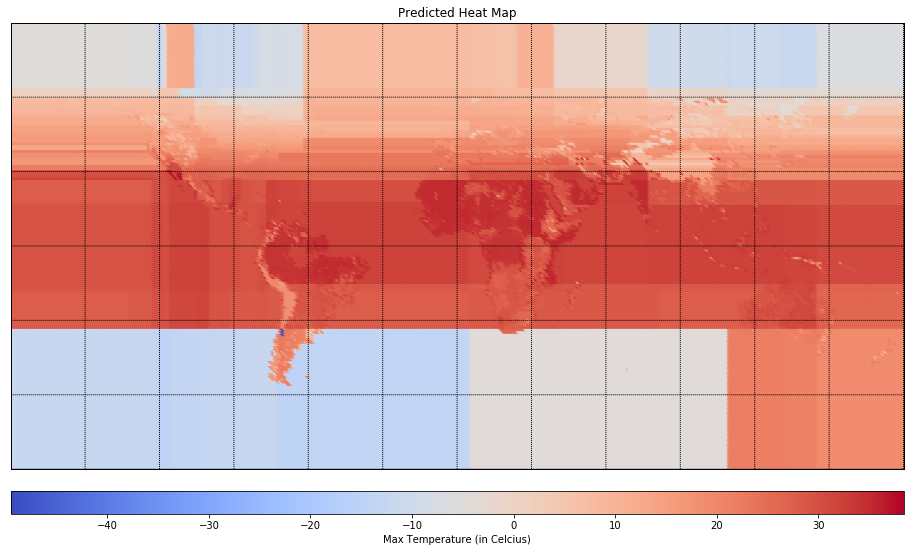

In [73]:
plt.figure(figsize=(16,12))

eq_map = Basemap(projection='cyl', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=0)
# eq_map.drawcoastlines()
# eq_map.drawcountries()
eq_map.fillcontinents(color = '#202020', lake_color='#3b3b3b', zorder=0.5)
eq_map.drawmapboundary(fill_color='#3b3b3b')
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))

lon = []
lat = []
val = []

for y in collected_predictions:
    lon.append(y['longitude'])
    lat.append(y['latitude'])
    val.append(y['tmax_pred'])

x, y = eq_map(lon, lat)

cs = eq_map.scatter(x, y, c=val, marker="o", cmap=cm.coolwarm)
cbar = eq_map.colorbar(cs,location='bottom',pad="5%")
cbar.set_label('Max Temperature (in Celcius)')
plt.title('Predicted Heat Map')
plt.show()

In [74]:
pred = model.transform(holdout).collect()

collected_predictions = list(map(lambda row: row.asDict(), pred))

collected_predictions

[{'date': datetime.date(2000, 6, 18),
  'elevation': 34.0,
  'features': DenseVector([25.333, 55.517, 34.0]),
  'latitude': 25.33300018310547,
  'longitude': 55.516998291015625,
  'station': 'AE000041196',
  'tmax': 37.099998474121094,
  'tmax_pred': 32.54940962105588},
 {'date': datetime.date(2002, 4, 10),
  'elevation': 34.0,
  'features': DenseVector([25.333, 55.517, 34.0]),
  'latitude': 25.33300018310547,
  'longitude': 55.516998291015625,
  'station': 'AE000041196',
  'tmax': 35.900001525878906,
  'tmax_pred': 32.54940962105588},
 {'date': datetime.date(2003, 5, 8),
  'elevation': 34.0,
  'features': DenseVector([25.333, 55.517, 34.0]),
  'latitude': 25.33300018310547,
  'longitude': 55.516998291015625,
  'station': 'AE000041196',
  'tmax': 41.20000076293945,
  'tmax_pred': 32.54940962105588},
 {'date': datetime.date(2003, 9, 26),
  'elevation': 34.0,
  'features': DenseVector([25.333, 55.517, 34.0]),
  'latitude': 25.33300018310547,
  'longitude': 55.516998291015625,
  'station'

/Users/mvachher/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/mvachher/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


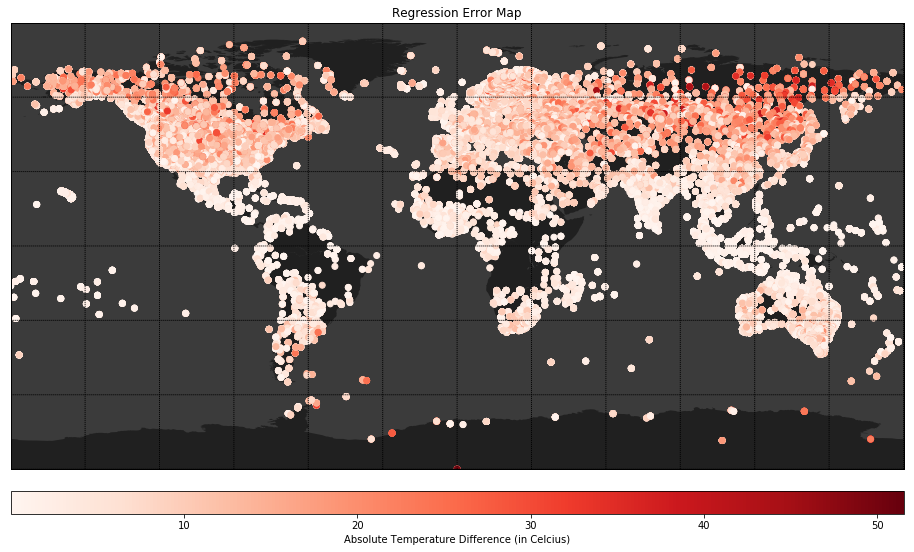

In [77]:
plt.figure(figsize=(16,12))

eq_map = Basemap(projection='cyl', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=0)
# eq_map.drawcoastlines()
# eq_map.drawcountries()
eq_map.fillcontinents(color = '#202020', lake_color='#3b3b3b', zorder=0.5)
eq_map.drawmapboundary(fill_color='#3b3b3b')
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))

lon = []
lat = []
val = []

for y in collected_predictions:
    lon.append(y['longitude'])
    lat.append(y['latitude'])
    val.append(abs(y['tmax_pred'] - y['tmax']))

x, y = eq_map(lon, lat)

cs = eq_map.scatter(x, y, c=val, marker="o", cmap=cm.Reds)
cbar = eq_map.colorbar(cs,location='bottom',pad="5%")
cbar.set_label('Absolute Temperature Difference (in Celcius)')
plt.title('Regression Error Map')
plt.show()